In [1]:
import os
os.chdir("..")

import networkx as nx
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os.path
import pathpy as pp
import my_functions
from my_functions import matprint
import igraph
import csv
from tabulate import tabulate

from chord import Chord
import holoviews as hv

from IPython.display import * # no idea what this does
from IPython.display import HTML # no idea what this does

**csh tutorial:** https://ingoscholtes.github.io/pathpy/tutorial.html#data <br>
**old pathpy repo:** https://github.com/IngoScholtes/pathpy <br>
**pathpy 3 repo:** https://github.com/pathpy/pathpy <br>
**networkx cool stuff:** https://networkx.org/documentation/stable/auto_examples/index.html <br>
**graph tool has nice viz:** https://graph-tool.skewed.de <br>
**location viz:** https://networkx.org/documentation/stable/auto_examples/drawing/plot_knuth_miles.html#sphx-glr-auto-examples-drawing-plot-knuth-miles-py <br>
**sankeys and chord graphs?**

# Tube

In [11]:
# from paths dataset - use this instead
tube_paths = pp.Paths.read_file("Data/Tube/tube_paths_train.ngram", separator=',', frequency=True)
m1 = pp.Network.from_paths(tube_paths)
print(tube_paths)

2021-04-25 11:41:49 [Severity.INFO]	Reading ngram data ... 
2021-04-25 11:41:49 [Severity.INFO]	finished. Read 61748 paths with maximum length 35
2021-04-25 11:41:49 [Severity.INFO]	Calculating sub path statistics ... 
2021-04-25 11:41:56 [Severity.INFO]	finished.
Total path count: 		2147865.0 
[Unique / Sub paths / Total]: 	[61748.0 / 88844179.0 / 90992044.0]
Nodes:				268 
Edges:				646
Max. path length:		35
Avg path length:		6.752909051546536 
Paths of length k = 0		0.0 [ 0.0 / 16652202.0 / 16652202.0 ]
Paths of length k = 1		99956.0 [ 597.0 / 14404381.0 / 14504337.0 ]
Paths of length k = 2		173868.0 [ 964.0 / 12182604.0 / 12356472.0 ]
Paths of length k = 3		230562.0 [ 1511.0 / 10078001.0 / 10308563.0 ]
Paths of length k = 4		236412.0 [ 2136.0 / 8198110.0 / 8434522.0 ]
Paths of length k = 5		243768.0 [ 2800.0 / 6547275.0 / 6791043.0 ]
Paths of length k = 6		209948.0 [ 3506.0 / 5174028.0 / 5383976.0 ]
Paths of length k = 7		176409.0 [ 3928.0 / 4044268.0 / 4220677.0 ]
Paths of length 

In [15]:
m1, coreness = my_functions.get_coreness(m1,R=1)

AssertionError: Network must be ergodic.

# Taxi Data

In [4]:
# from paths dataset - use this instead
taxi_paths = pp.Paths.read_file("Data/SF taxis/Sf taxis od.ngram", separator=',', frequency=True)
print(taxi_paths)

2021-04-25 11:40:56 [Severity.INFO]	Reading ngram data ... 
2021-04-25 11:40:56 [Severity.INFO]	finished. Read 53 paths with maximum length 20
2021-04-25 11:40:56 [Severity.INFO]	Calculating sub path statistics ... 
2021-04-25 11:40:56 [Severity.INFO]	finished.
Total path count: 		12683.0 
[Unique / Sub paths / Total]: 	[50.0 / 423316.0 / 435999.0]
Nodes:				194 
Edges:				244
Max. path length:		20
Avg path length:		5.1865489237562095 
Paths of length k = -1		1232.0 [ 1.0 / 0.0 / 1232.0 ]
Paths of length k = 0		657.0 [ 2.0 / 77807.0 / 78464.0 ]
Paths of length k = 1		1633.0 [ 4.0 / 65123.0 / 66756.0 ]
Paths of length k = 2		1946.0 [ 7.0 / 53759.0 / 55705.0 ]
Paths of length k = 3		1169.0 [ 7.0 / 45118.0 / 46287.0 ]
Paths of length k = 4		505.0 [ 3.0 / 38310.0 / 38815.0 ]
Paths of length k = 5		719.0 [ 4.0 / 31793.0 / 32512.0 ]
Paths of length k = 6		493.0 [ 2.0 / 26221.0 / 26714.0 ]
Paths of length k = 7		666.0 [ 3.0 / 20969.0 / 21635.0 ]
Paths of length k = 8		937.0 [ 5.0 / 16112.0 / 

In [5]:
m1 = pp.Network.from_paths(taxi_paths)

# network statistics
print('Static Network Statistics:')
print("number of nodes: {}".format(m1.ncount()))
print("maximum possible edges: {}".format(scipy.special.comb(m1.ncount(), 2)))
print("number of edges: {}".format(m1.ecount()))
# print("total edge weight: {}".format(m1.transition_matrix())) # not what I expected it to do

print("average clustering coefficient: {}".format(pp.algorithms.statistics.avg_clustering_coefficient(m1)))
print("network diameter: {}".format(pp.algorithms.shortest_paths.diameter(m1)))
A = m1.adjacency_matrix(weighted=True)
# Adense = A.todense()

Static Network Statistics:
number of nodes: 193
maximum possible edges: 18528.0
number of edges: 244
average clustering coefficient: 0.013816925734024179
network diameter: inf


In [6]:
m1 = my_functions.remove_hanging(m1)
print("network diameter: {}".format(pp.algorithms.shortest_paths.diameter(m1)))
m1.ncount()

network diameter: inf


171

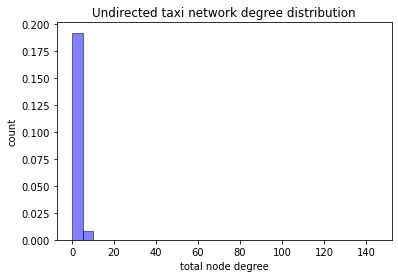

In [7]:
# degree distribution + histogram
# power law
degrees = m1.degrees()
#indegrees = m1.degrees(degree="indegree")
#outdegrees = m1.degrees(degree="outdegree")
# fixed bin size
bins = np.arange(0, 150, 5)
plt.hist(degrees,density=True,bins=bins,alpha=0.5,color='b',edgecolor="black")
plt.title('Undirected taxi network degree distribution')
plt.xlabel('total node degree')
plt.ylabel('count')
plt.show()

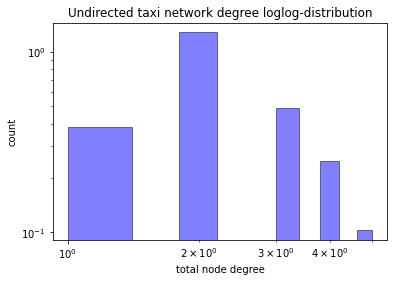

In [8]:
# log-log plot (not cdf) shows not exactly straight line indicating no power law
plt.hist(degrees,density=True,log=True,alpha=0.5,color='b',edgecolor="black")
plt.title('Undirected taxi network degree loglog-distribution')
plt.xscale('log')
plt.xlabel('total node degree')
plt.ylabel('count')
plt.show()

In [9]:
m2 = pp.HigherOrderNetwork(taxi_paths,k=2)
m2
# network clearly has disconnected edges

# Flight Data
Leaving out departure data and focusing on pathway data <br>
**NOTE:** using subset for now for speed. Fix this in Data Processing notebook once ready.

    # from departures dataset
    m1 = pp.Network.read_file("Data/US flights 2011/US flights 2011.edges",directed=True)

    # network statistics
    print('Network Statistics:')
    print("number of nodes: {}".format(m1.ncount()))
    print("number of edges: {}".format(m1.ecount()))
    # print("total edge weight: {}".format(m1.transition_matrix())) # not what I expected it to do

    print("average clustering coefficient: {}".format(pp.algorithms.statistics.avg_clustering_coefficient(m1)))
    print("network diameter: {}".format(pp.algorithms.shortest_paths.diameter(m1)))

In [10]:
# from paths dataset - use this instead
flight_paths = pp.Paths.read_file("Data/US flights 2011/US flights od.ngram", separator=',', frequency=True)
print(flight_paths)

2021-04-25 11:41:19 [Severity.INFO]	Reading ngram data ... 
2021-04-25 11:41:19 [Severity.INFO]	finished. Read 358 paths with maximum length 7
2021-04-25 11:41:19 [Severity.INFO]	Calculating sub path statistics ... 
2021-04-25 11:41:19 [Severity.INFO]	finished.
Total path count: 		12738.0 
[Unique / Sub paths / Total]: 	[358.0 / 55166.0 / 67904.0]
Nodes:				103 
Edges:				474
Max. path length:		7
Avg path length:		1.7272727272727273 
Paths of length k = 0		0.0 [ 0.0 / 34740.0 / 34740.0 ]
Paths of length k = 1		4846.0 [ 21.0 / 17156.0 / 22002.0 ]
Paths of length k = 2		7014.0 [ 130.0 / 2250.0 / 9264.0 ]
Paths of length k = 3		408.0 [ 108.0 / 964.0 / 1372.0 ]
Paths of length k = 4		452.0 [ 83.0 / 42.0 / 494.0 ]
Paths of length k = 5		14.0 [ 13.0 / 10.0 / 24.0 ]
Paths of length k = 6		2.0 [ 2.0 / 4.0 / 6.0 ]
Paths of length k = 7		2.0 [ 1.0 / 0.0 / 2.0 ]



In [9]:
# help(pp.visualisation.alluvial) 

## Time-aggregated network analysis
Check if the network is sparse, $M \ll M_{max}=\begin{pmatrix} N \\ 2\end{pmatrix}$ Or $M=\mathcal{o}(M_{max})$. So here there are 10 times as many possible edges as edges, is that sparse? <br>
$f(n) = \mathcal{O}(1)$ if $\frac{f(n)}{c}\to1$ as $n \to \infty$ for any $c$ at all. Of the same order as. <br>
$f(n) = \mathcal{o}(1)$ if $\frac{f(n)}{c}\to0$ as $n \to \infty$ for any $c$ at all. Ultimately smaller than. <br>
This isn't really relevent.

In [3]:
m1 = pp.Network.from_paths(flight_paths)

# network statistics
print('Static Network Statistics:')
print("number of nodes: {}".format(m1.ncount()))
print("maximum possible edges: {}".format(scipy.special.comb(m1.ncount(), 2)))
print("number of edges: {}".format(m1.ecount()))
# print("total edge weight: {}".format(m1.transition_matrix())) # not what I expected it to do

print("average clustering coefficient: {}".format(pp.algorithms.statistics.avg_clustering_coefficient(m1)))
print("network diameter: {}".format(pp.algorithms.shortest_paths.diameter(m1)))
A = m1.adjacency_matrix(weighted=True)
# Adense = A.todense()

Static Network Statistics:
number of nodes: 103
maximum possible edges: 5253.0
number of edges: 474
average clustering coefficient: 0.44865867613272703
network diameter: inf


## Notes:
The graph has infinite diameter which means it is disconnected https://mathworld.wolfram.com/GraphDiameter.html . <br>
**Lecture notes definition:** a set is an ergodic set if it's possible to go from any states $i$ to $j$ within the set and a process doesn't leave the set once it's in it. A state that's not in the ergodic set is called a *transient* state. I should also check there are no nodes with no outgoing links because then the transition probability for the discrete Markov chain $(181)$ will blow up <br>
So it seems like I'll have to double check a lot of the centrality measures I did on it.

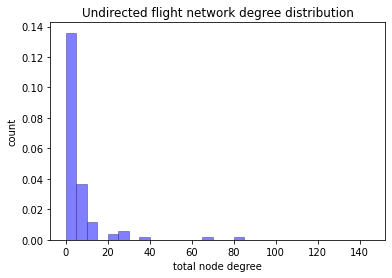

In [4]:
# degree distribution + histogram
# power law
degrees = m1.degrees()
#indegrees = m1.degrees(degree="indegree")
#outdegrees = m1.degrees(degree="outdegree")
# fixed bin size
bins = np.arange(0, 150, 5)
plt.hist(degrees,density=True,bins=bins,alpha=0.5,color='b',edgecolor="darkslateblue")
plt.title('Undirected flight network degree distribution')
plt.xlabel('total node degree')
plt.ylabel('count')
plt.show()

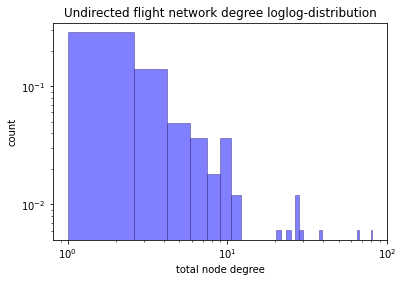

In [5]:
# log-log plot (not cdf) shows not exactly straight line indicating no power law
plt.hist(degrees,density=True,log=True,bins=50,alpha=0.5,color='b',edgecolor="darkslateblue")
plt.title('Undirected flight network degree loglog-distribution')
plt.xscale('log')
plt.xlabel('total node degree')
plt.ylabel('count')
plt.show()

In [7]:
# centrality analyses - can use on paths or higher-order networks or paths
# M1 IS NOT ERGODIC => TELEPORTATIONS NEEDED
# node traversals / visitation probabilities for paths
# closeness for higher-order because projects back down
eig_cents = pp.algorithms.centralities.eigenvector(m1)
betw_cents = pp.algorithms.centralities.betweenness(m1)
close_cents = pp.algorithms.centralities.closeness(m1)
pr_cents = pp.algorithms.centralities.pagerank(m1)

# top 10 for each centrality
eig_ranks10 = pp.algorithms.centralities.rank_centralities(eig_cents)[:10]
pr_cents10 = pp.algorithms.centralities.rank_centralities(pr_cents)[:10]
close_cents10 = pp.algorithms.centralities.rank_centralities(close_cents)[:10]
betw_cents10 = pp.algorithms.centralities.rank_centralities(betw_cents)[:10]


2021-04-18 15:51:16 [Severity.INFO]	Calculating betweenness centralities ...
2021-04-18 15:51:17 [Severity.INFO]	Calculating closeness in network ...
2021-04-18 15:51:17 [Severity.INFO]	finished.


In [8]:
# measure the correlation between the centrality measures
cent_vals  = pd.DataFrame(list(eig_cents.values()))
cent_vals.columns = ["eigenvector"]
cent_vals["PageRank"]  = pd.DataFrame(list(pr_cents.values()))
cent_vals["betweenness"]  = pd.DataFrame(list(betw_cents.values()))
cent_vals["closeness"]  = pd.DataFrame(list(close_cents.values()))
cent_vals.index = list(eig_cents.keys())
print("Correlations:")
print(cent_vals.corr(method='pearson'))
cent_vals

# eigenvector and PageRank are pretty highly correlated which is too 
# be expected but betweenness and closeness are both very different
# because they measure quite different aspects of the nodes

Correlations:
             eigenvector  PageRank  betweenness  closeness
eigenvector     1.000000  0.903479     0.196856   0.249487
PageRank        0.903479  1.000000     0.123303   0.142602
betweenness     0.196856  0.123303     1.000000   0.046122
closeness       0.249487  0.142602     0.046122   1.000000


,eigenvector,PageRank,betweenness,closeness
LAX,0.060708,0.142255,90.000000,0.502463
ORF,0.004649,0.003599,8.664075,0.536842
BNA,0.008741,0.006447,27.108936,0.633540
SJC,0.031587,0.039387,4.629760,0.548387
FAT,0.008651,0.005100,37.610535,0.368231
...,...,...,...,...
OTH,0.004003,0.003295,0.000000,0.000000
MOD,0.004003,0.003295,0.000000,0.000000
OKC,0.004649,0.003599,0.000000,0.000000
SAF,0.004649,0.003599,0.000000,0.000000


In [9]:
# print top 10 centralities by each measure
centralities = pd.DataFrame(list(zip(*eig_ranks10))[0])
centralities.columns = ["eigenvector"]
centralities["betweenness"] = list(zip(*betw_cents10))[0]
centralities["closeness"] = list(zip(*close_cents10))[0]
centralities["PageRank"] = list(zip(*pr_cents10))[0]
centralities

# agree on top 4 airports, then betweenness places SNA one above all the others and ranks SJC lower
# overall betweenness diverges the most from consenus

,eigenvector,betweenness,closeness,PageRank
0,LAX,LAX,LAX,LAX
1,SFO,SFO,SFO,SFO
2,SAN,SAN,SAN,SAN
3,SJC,OAK,SMF,SJC
4,SMF,SNA,SJC,OAK
5,SNA,SMF,SNA,SMF
6,OAK,ONT,OAK,SNA
7,PHX,SJC,PHX,ONT
8,ONT,FAT,ONT,PHX
9,SEA,BUR,LAS,SEA


In [10]:
print("Eigenvector centralities")
print(tabulate(eig_ranks10))
print("PageRank centralities")
print(tabulate(pr_cents10))
print("Closeness centralities")
print(tabulate(close_cents10))
print("Betweenness centralities")
print(tabulate(betw_cents10))

Eigenvector centralities
---  ---------
LAX  0.0607076
SFO  0.0522745
SAN  0.0370727
SJC  0.0315867
SMF  0.03106
SNA  0.0310521
OAK  0.0293135
PHX  0.0228557
ONT  0.0223851
SEA  0.0203744
---  ---------
PageRank centralities
---  ---------
LAX  0.142255
SFO  0.0970863
SAN  0.0531869
SJC  0.039387
OAK  0.0368782
SMF  0.0347979
SNA  0.0312203
ONT  0.0212575
PHX  0.0179932
SEA  0.0146596
---  ---------
Closeness centralities
---  --------
LAX  0.910714
SFO  0.784615
SAN  0.671053
SMF  0.6375
SJC  0.63354
SNA  0.618182
OAK  0.610778
PHX  0.6
ONT  0.6
LAS  0.589595
---  --------
Betweenness centralities
---  ---------
LAX  4564.5
SFO  2723.97
SAN   585.435
OAK   399.128
SNA   334.445
SMF   307.035
ONT   293.26
SJC   233.392
FAT    90
BUR    61.9883
---  ---------


In [42]:
names = list(m1.nodes.keys())
mat = m1.adjacency_matrix().todense().tolist()


In [47]:
Chord(mat,names).to_html()

In [69]:
# visualise - use only when using sample of data
m1 # use this instead

## Higher-order network
So pathpy actually has multi-order models and memory networks - I just want to explore memory networks first.
### Useful functions: <br>
    pp.HigherOrderNetwork(paths,k=order)
    pp.higher_order_network. + 
    adjacency_matrix(self, include_subpaths=True, weighted=True, transposed=False)
    laplacian_matrix(self, include_subpaths=True)
    summary(self)
    transition_matrix(self, include_subpaths=True)
    ecount(self)
    ncount(self)
    from_paths(paths)
    leading_eigenvector(A, normalized=True, lanczos_vecs=None, maxiter=None) 

In [73]:
m2 = pp.HigherOrderNetwork(flight_paths,k=2)
m2
# network clearly has disconnected edges

In [79]:
# network statistics
print('M2 Network Statistics:')
print("number of nodes: {} (i.e. the number of edges in M1 network)".format(m2.ncount()))
print("number of edges: {}".format(m2.ecount()))
#print("total edge weight: {}".format(m1.transition_matrix())) # not what I expected it to do

print("average clustering coefficient: {}".format(pp.algorithms.statistics.avg_clustering_coefficient(m1)))
print("network diameter: {}".format(pp.algorithms.shortest_paths.diameter(m1)))

M2 Network Statistics:
number of nodes: 473 (i.e. the number of edges in M1 network)
number of edges: 630
average clustering coefficient: 0.44705890333102327
network diameter: inf


In [72]:
A2 = m2.adjacency_matrix()
v1 = m2.leading_eigenvector(A2)

## Multi-order models

    help(pp.MultiOrderModel)
`estimate_order` estimates the optimal **maximum** order of the hierarchical model. `layer_likelihood` calculates the likelhood of the **first** l layers of a multi-order network model. Likelihood calculates the likelihood of the whole model. Try `test_network_hypothesis(self, paths, method='AIC')` to see if it's a network, doesn't consider nested models.

In [8]:
m1 = pp.MultiOrderModel(flight_paths, max_order=1) 
m2 = pp.MultiOrderModel(flight_paths, max_order=2)
m3 = pp.MultiOrderModel(flight_paths, max_order=3)

2021-04-01 20:48:31 [Severity.INFO]	Generating 0-th order layer ...
2021-04-01 20:48:31 [Severity.INFO]	Generating 1-th order layer ...
2021-04-01 20:48:31 [Severity.INFO]	finished.
2021-04-01 20:48:31 [Severity.INFO]	Generating 0-th order layer ...
2021-04-01 20:48:31 [Severity.INFO]	Generating 1-th order layer ...
2021-04-01 20:48:31 [Severity.INFO]	Generating 2-th order layer ...
2021-04-01 20:48:33 [Severity.INFO]	finished.
2021-04-01 20:48:33 [Severity.INFO]	Generating 0-th order layer ...
2021-04-01 20:48:33 [Severity.INFO]	Generating 1-th order layer ...
2021-04-01 20:48:33 [Severity.INFO]	Generating 2-th order layer ...
2021-04-01 20:48:34 [Severity.INFO]	Generating 3-th order layer ...
2021-04-01 20:48:36 [Severity.INFO]	finished.


In [9]:
print(m1.summary)
print(m2.summary)
print(m3.summary)

<bound method MultiOrderModel.summary of <pathpy.classes.multi_order_model.MultiOrderModel object at 0x166f85850>>
<bound method MultiOrderModel.summary of <pathpy.classes.multi_order_model.MultiOrderModel object at 0x165b036d0>>
<bound method MultiOrderModel.summary of <pathpy.classes.multi_order_model.MultiOrderModel object at 0x105251ac0>>


In [10]:
# Calculates the likelihood of a multi-order network model up to a maximum order max_order based on all path statistics
print('Likelihood = ', m1.likelihood(flight_paths, log=False))
print('Log-likelihood = ', m1.likelihood(flight_paths, log=True))

/usr/local/lib/python3.9/site-packages/pathpy/classes/multi_order_model.py:326: RuntimeWarning: underflow encountered in exp
  return likelihood if log else np.exp(likelihood)


Likelihood =  0.0
Log-likelihood =  -12222217.04195787


In [11]:
print('Likelihood = ', m2.likelihood(flight_paths, log=False))
print('Log-likelihood = ', m2.likelihood(flight_paths, log=True))

Likelihood =  0.0
Log-likelihood =  -10417727.35236143


In [12]:
print('Optimal maximum order = ', m2.estimate_order(flight_paths))
# Optimal order is at least 2, but may be higher.Try to increase `stop_at_order`

2021-04-01 20:49:36 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 3608979.3791928813
2021-04-01 20:49:36 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 106829
2021-04-01 20:49:36 [Severity.INFO]	Likelihood ratio test, p = 0.0
2021-04-01 20:49:36 [Severity.WARNING]	Optimal order is at least 2, but may be higher.Try to increase `stop_at_order`
Optimal maximum order =  2


In [13]:
print('Optimal maximum order = ', m3.estimate_order(flight_paths))
# Optimal order is at 2

2021-04-01 20:49:42 [Severity.INFO]	Likelihood ratio test for K_opt = 2, x = 3608979.3791928813
2021-04-01 20:49:42 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 106829
2021-04-01 20:49:42 [Severity.INFO]	Likelihood ratio test, p = 0.0
2021-04-01 20:49:49 [Severity.INFO]	Likelihood ratio test for K_opt = 3, x = 385091.24200374633
2021-04-01 20:49:49 [Severity.INFO]	Likelihood ratio test, d_1-d_0 = 2616772
2021-04-01 20:49:49 [Severity.INFO]	Likelihood ratio test, p = 1.0
Optimal maximum order =  2


# Comparing memory network with time-aggregated network
**Basics:** same number of nodes? edges? <br>

**Centrality measures:** what nodes are identified as most important in each model? <br>

| Memory model | Time-aggregated model |
| :----------- | :-------------------- |
|  | PageRank |
|  | eigenvector |
|  | betweenness|

**Clustering:** How do clusters differ? How to compare clustering performance? <br>
**Graph distances** Are there ways of comparing?

**Predictive performance?:**
Look at conditional entropy